In [1]:
import sys
import os
# Add the parent directory (Tennis_Sport_Analysis) to the path
sys.path.append(os.path.dirname(os.getcwd()))
from utils import cluster_series
import matplotlib.pyplot as plt
import numpy as np

In [2]:
len_video = 305
predicted_v_shaped_frames= [107, 108, 109, 110, 111, 112, 120, 139, 140, 141, 142, 143, 144, 145, 170, 171, 172, 173, 174, 175, 198, 199, 200, 201, 202, 203, 204, 214, 231, 232, 233, 234, 235, 236, 237, 274, 275, 276, 277, 278, 279, 280, 281, 282, 302, 303, 304, 52, 53, 54, 55, 56, 57, 80, 81, 82, 83, 84, 85]
predicted_bounce_frames = cluster_series(predicted_v_shaped_frames)
upper_court_bounce_frames = predicted_bounce_frames[::2]  # Assuming alternating frames belong to upper and lower courts
lower_court_bounce_frames = predicted_bounce_frames[1::2]
GT_upper_court_bounce_frames = [50, 106, 168, 230, 301]
GT_lower_court_bounce_frames = [20, 77, 138, 197, 270]

print("Predicted Bounce Frames:", predicted_bounce_frames)
print("Upper Court Bounce Frames:", upper_court_bounce_frames)
print("Lower Court Bounce Frames:", lower_court_bounce_frames)
print("GT Upper Court Bounce Frames:", GT_upper_court_bounce_frames)
print("GT Lower Court Bounce Frames:", GT_lower_court_bounce_frames)

Predicted Bounce Frames: [50, 78, 105, 137, 168, 196, 229, 272, 300]
Upper Court Bounce Frames: [50, 105, 168, 229, 300]
Lower Court Bounce Frames: [78, 137, 196, 272]
GT Upper Court Bounce Frames: [50, 106, 168, 230, 301]
GT Lower Court Bounce Frames: [20, 77, 138, 197, 270]


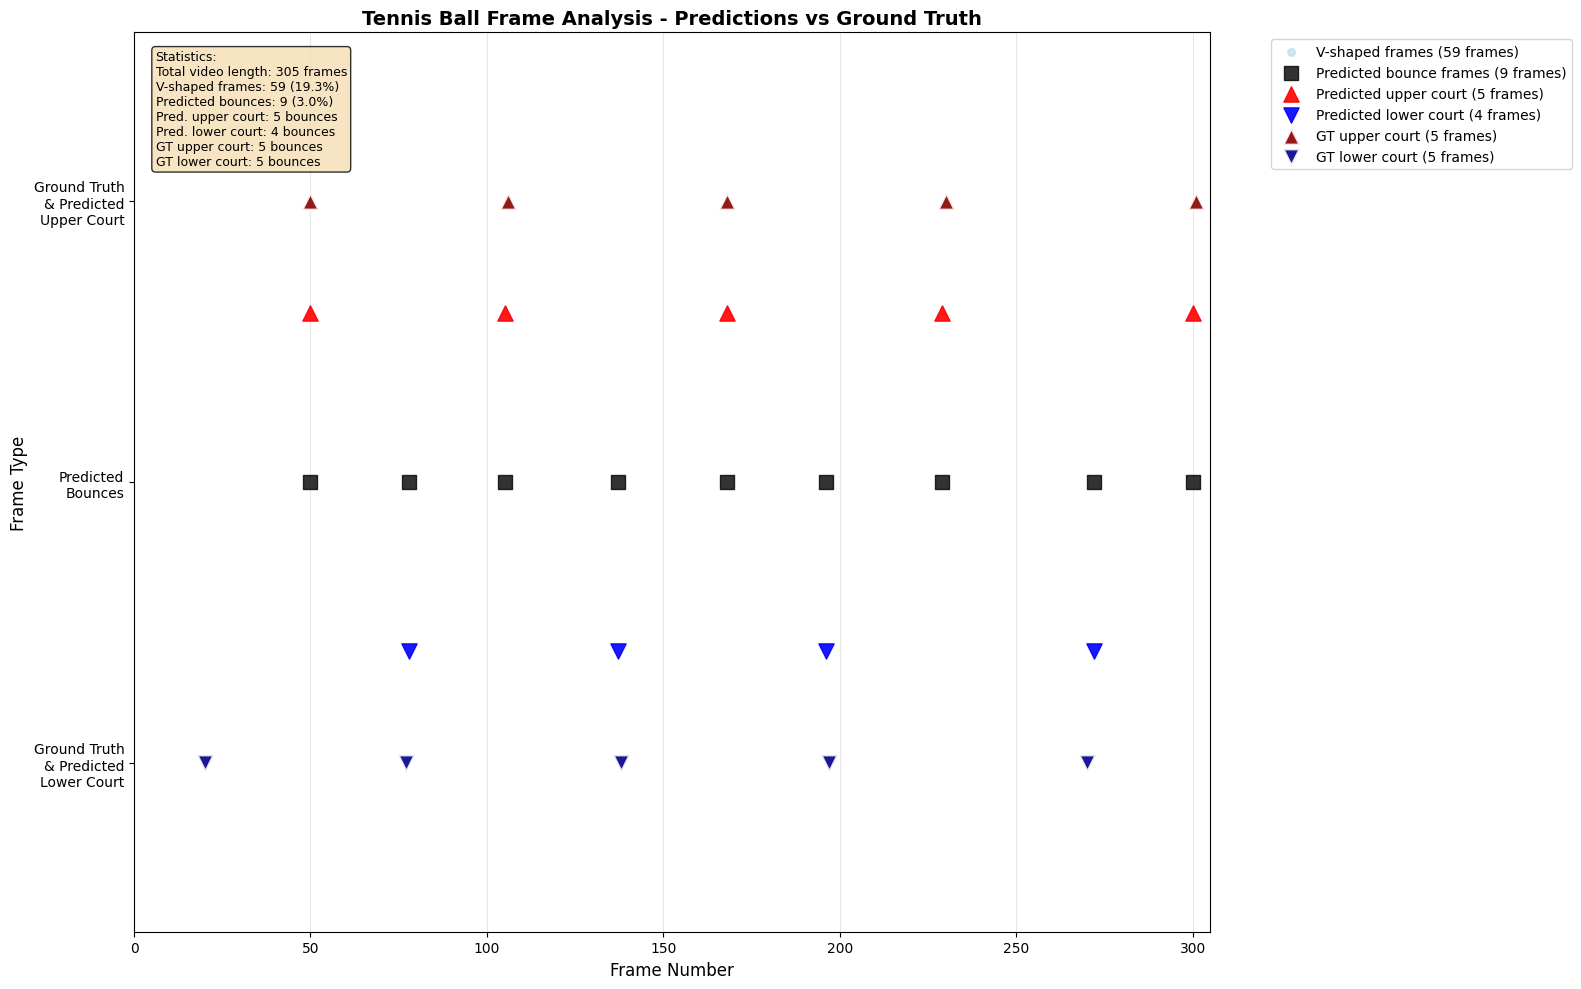

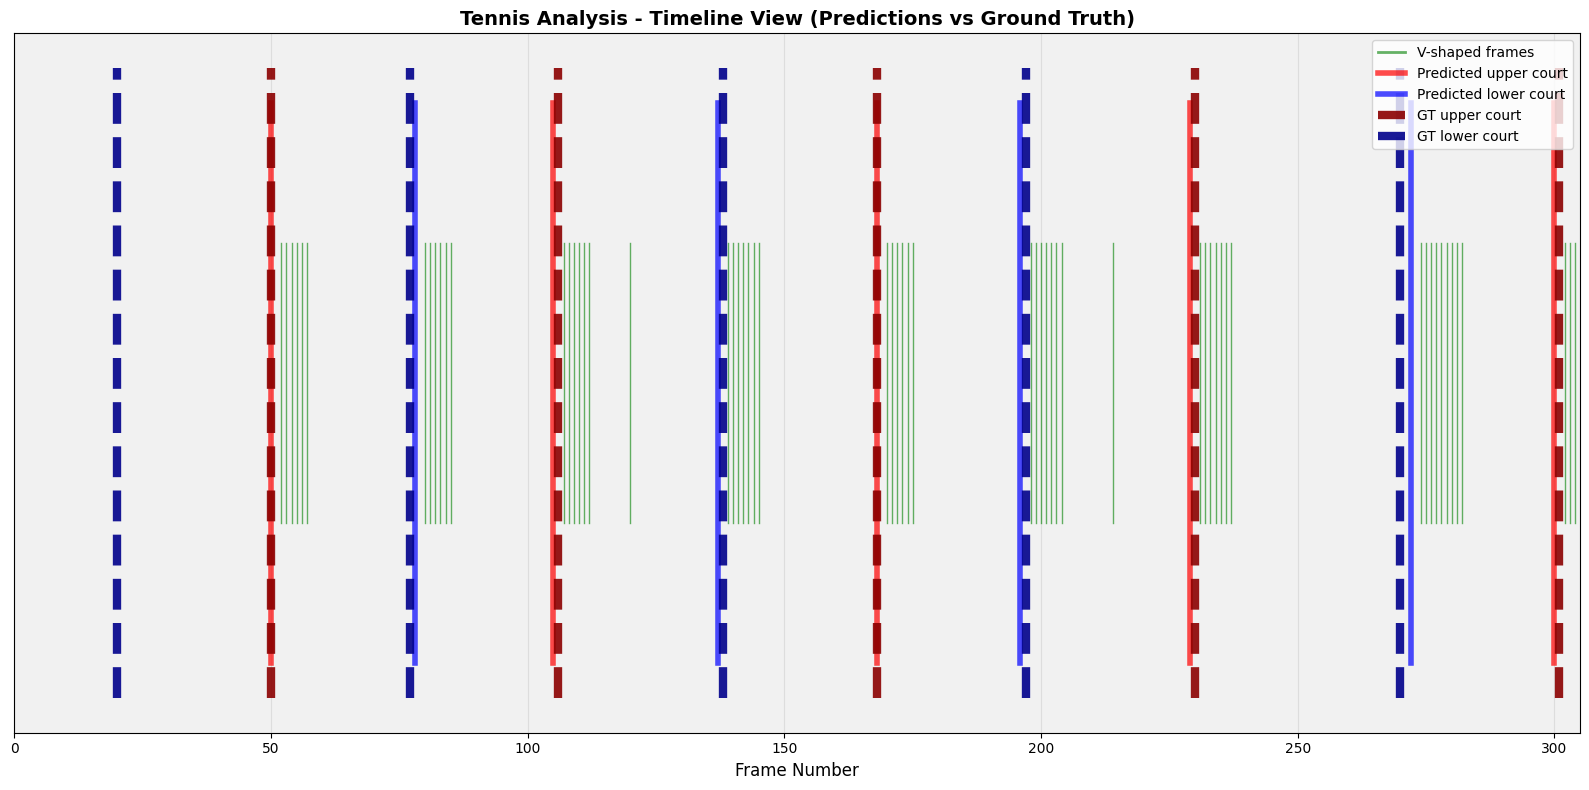

Upper Court Metrics:
  Matches: 5/5
  Precision: 1.000
  Recall: 1.000
  F1-Score: 1.000

Lower Court Metrics:
  Matches: 4/5
  Precision: 1.000
  Recall: 0.800
  F1-Score: 0.889

Overall Metrics:
  Matches: 9/10
  Precision: 1.000
  Recall: 0.900
  F1-Score: 0.947


In [3]:
# Create comprehensive visualization of frame distributions with ground truth comparison
plt.figure(figsize=(16, 10))

# Plot predicted_v_shaped_frames as scatter points
plt.scatter(predicted_v_shaped_frames, [1]*len(predicted_v_shaped_frames), 
           alpha=0.6, s=30, marker='o', color='lightblue', 
           label=f'V-shaped frames ({len(predicted_v_shaped_frames)} frames)', zorder=1)

# Plot predicted_bounce_frames with different marker
plt.scatter(predicted_bounce_frames, [2]*len(predicted_bounce_frames), 
           alpha=0.8, s=100, marker='s', color='black', 
           label=f'Predicted bounce frames ({len(predicted_bounce_frames)} frames)', zorder=3)

# Plot predicted upper_court_bounce_frames with distinct color
plt.scatter(upper_court_bounce_frames, [2.3]*len(upper_court_bounce_frames), 
           alpha=0.9, s=120, marker='^', color='red', 
           label=f'Predicted upper court ({len(upper_court_bounce_frames)} frames)', zorder=4)

# Plot predicted lower_court_bounce_frames with distinct color
plt.scatter(lower_court_bounce_frames, [1.7]*len(lower_court_bounce_frames), 
           alpha=0.9, s=120, marker='v', color='blue', 
           label=f'Predicted lower court ({len(lower_court_bounce_frames)} frames)', zorder=4)

# Plot GROUND TRUTH upper_court_bounce_frames
plt.scatter(GT_upper_court_bounce_frames, [2.5]*len(GT_upper_court_bounce_frames), 
           alpha=0.9, s=150, marker='^', color='darkred', edgecolors='white', linewidth=2,
           label=f'GT upper court ({len(GT_upper_court_bounce_frames)} frames)', zorder=5)

# Plot GROUND TRUTH lower_court_bounce_frames
plt.scatter(GT_lower_court_bounce_frames, [1.5]*len(GT_lower_court_bounce_frames), 
           alpha=0.9, s=150, marker='v', color='darkblue', edgecolors='white', linewidth=2,
           label=f'GT lower court ({len(GT_lower_court_bounce_frames)} frames)', zorder=5)

# Customize the plot
plt.xlim(0, len_video)
plt.ylim(1.2, 2.8)
plt.xlabel('Frame Number', fontsize=12)
plt.ylabel('Frame Type', fontsize=12)
plt.title('Tennis Ball Frame Analysis - Predictions vs Ground Truth', fontsize=14, fontweight='bold')

# Set y-tick labels
plt.yticks([1.5, 2, 2.5], ['Ground Truth\n& Predicted\nLower Court', 'Predicted\nBounces', 'Ground Truth\n& Predicted\nUpper Court'])

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='x')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add some statistics as text
stats_text = f"""Statistics:
Total video length: {len_video} frames
V-shaped frames: {len(predicted_v_shaped_frames)} ({len(predicted_v_shaped_frames)/len_video*100:.1f}%)
Predicted bounces: {len(predicted_bounce_frames)} ({len(predicted_bounce_frames)/len_video*100:.1f}%)
Pred. upper court: {len(upper_court_bounce_frames)} bounces
Pred. lower court: {len(lower_court_bounce_frames)} bounces
GT upper court: {len(GT_upper_court_bounce_frames)} bounces
GT lower court: {len(GT_lower_court_bounce_frames)} bounces"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

# Create a timeline view with ground truth comparison
plt.figure(figsize=(16, 8))

# Create a timeline visualization
timeline_height = 0.5
plt.barh(0, len_video, height=timeline_height*2, color='lightgray', alpha=0.3, label='Video timeline')

# Add v-shaped frames as vertical lines
for frame in predicted_v_shaped_frames:
    plt.axvline(x=frame, ymin=0.3, ymax=0.7, color='green', alpha=0.6, linewidth=1)


# Highlight predicted upper court bounces
for frame in upper_court_bounce_frames:
    plt.axvline(x=frame, ymin=0.1, ymax=0.9, color='red', alpha=0.7, linewidth=4)

# Highlight predicted lower court bounces
for frame in lower_court_bounce_frames:
    plt.axvline(x=frame, ymin=0.1, ymax=0.9, color='blue', alpha=0.7, linewidth=4)

# Add GROUND TRUTH upper court bounces (with different pattern)
for frame in GT_upper_court_bounce_frames:
    plt.axvline(x=frame, ymin=0.05, ymax=0.95, color='darkred', alpha=0.9, linewidth=6, linestyle='--')

# Add GROUND TRUTH lower court bounces (with different pattern)
for frame in GT_lower_court_bounce_frames:
    plt.axvline(x=frame, ymin=0.05, ymax=0.95, color='darkblue', alpha=0.9, linewidth=6, linestyle='--')

plt.xlim(0, len_video)
plt.ylim(-timeline_height, timeline_height)
plt.xlabel('Frame Number', fontsize=12)
plt.title('Tennis Analysis - Timeline View (Predictions vs Ground Truth)', fontsize=14, fontweight='bold')
plt.yticks([])

# Custom legend for timeline
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='green', lw=2, alpha=0.6, label='V-shaped frames'),
    Line2D([0], [0], color='red', lw=4, alpha=0.7, label='Predicted upper court'),
    Line2D([0], [0], color='blue', lw=4, alpha=0.7, label='Predicted lower court'),
    Line2D([0], [0], color='darkred', lw=6, alpha=0.9, linestyle='--', label='GT upper court'),
    Line2D([0], [0], color='darkblue', lw=6, alpha=0.9, linestyle='--', label='GT lower court')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Calculate accuracy metrics
def calculate_accuracy_metrics(predicted, ground_truth, tolerance=3):
    """Calculate accuracy metrics with tolerance for frame differences"""
    matches = 0
    for gt_frame in ground_truth:
        # Check if any predicted frame is within tolerance of ground truth
        if any(abs(pred_frame - gt_frame) <= tolerance for pred_frame in predicted):
            matches += 1
    
    precision = matches / len(predicted) if len(predicted) > 0 else 0
    recall = matches / len(ground_truth) if len(ground_truth) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'matches': matches,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# Calculate metrics for upper court
upper_metrics = calculate_accuracy_metrics(upper_court_bounce_frames, GT_upper_court_bounce_frames)
print("Upper Court Metrics:")
print(f"  Matches: {upper_metrics['matches']}/{len(GT_upper_court_bounce_frames)}")
print(f"  Precision: {upper_metrics['precision']:.3f}")
print(f"  Recall: {upper_metrics['recall']:.3f}")
print(f"  F1-Score: {upper_metrics['f1_score']:.3f}")

# Calculate metrics for lower court
lower_metrics = calculate_accuracy_metrics(lower_court_bounce_frames, GT_lower_court_bounce_frames)
print("\nLower Court Metrics:")
print(f"  Matches: {lower_metrics['matches']}/{len(GT_lower_court_bounce_frames)}")
print(f"  Precision: {lower_metrics['precision']:.3f}")
print(f"  Recall: {lower_metrics['recall']:.3f}")
print(f"  F1-Score: {lower_metrics['f1_score']:.3f}")

# Overall metrics
all_predicted = predicted_bounce_frames
all_ground_truth = GT_upper_court_bounce_frames + GT_lower_court_bounce_frames
overall_metrics = calculate_accuracy_metrics(all_predicted, all_ground_truth)
print("\nOverall Metrics:")
print(f"  Matches: {overall_metrics['matches']}/{len(all_ground_truth)}")
print(f"  Precision: {overall_metrics['precision']:.3f}")
print(f"  Recall: {overall_metrics['recall']:.3f}")
print(f"  F1-Score: {overall_metrics['f1_score']:.3f}")

MSE ERROR ANALYSIS

🎾 UPPER COURT:
   MSE: 0.600 frames²
   RMSE: 0.775 frames
   MAE: 0.600 frames
   Mean Error: -0.600 frames

🎾 LOWER COURT:
   MSE: 1.750 frames²
   RMSE: 1.323 frames
   MAE: 1.250 frames
   Mean Error: +0.250 frames

🏆 OVERALL:
   MSE: 1.111 frames²
   RMSE: 1.054 frames
   MAE: 0.889 frames
   Mean Error: -0.222 frames

📋 DETAILED ERRORS:
Upper Court (Predicted → GT):
   50 →  50 (error: +0)
  105 → 106 (error: -1)
  168 → 168 (error: +0)
  229 → 230 (error: -1)
  300 → 301 (error: -1)
Lower Court (Predicted → GT):
   78 →  77 (error: +1)
  137 → 138 (error: -1)
  196 → 197 (error: -1)
  272 → 270 (error: +2)


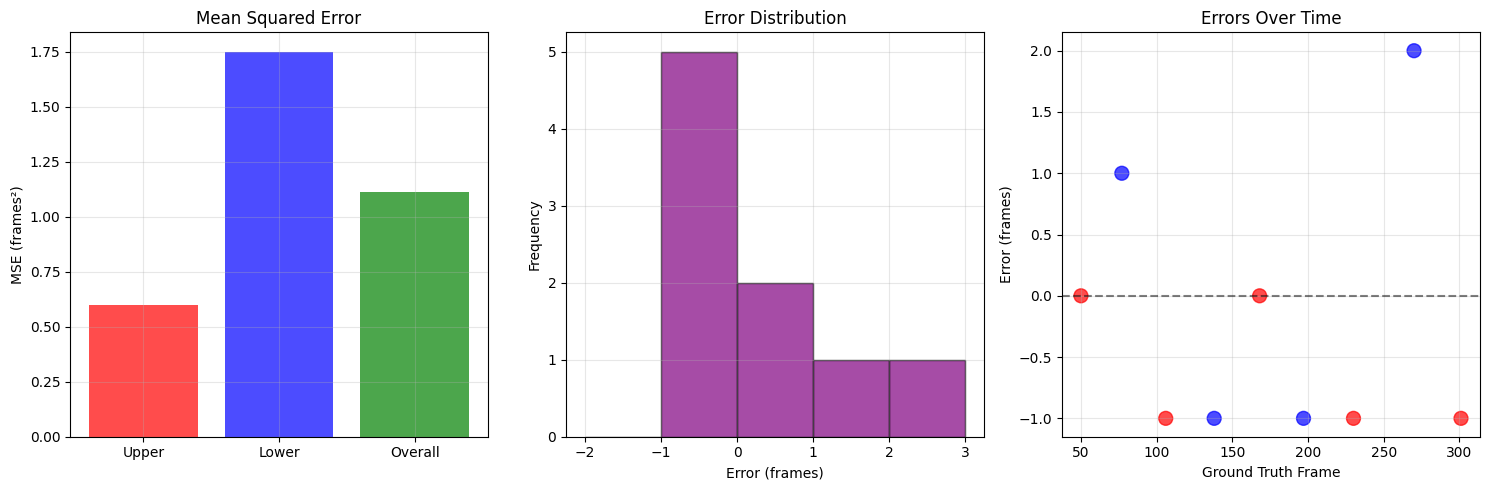


🎯 SUMMARY: Overall MSE = 1.111 frames² | RMSE = 1.054 frames


In [4]:
# MSE and Advanced Error Metrics Analysis
def calculate_mse_metrics(predicted, ground_truth, tolerance=3):
    """Calculate Mean Squared Error (MSE) and related metrics"""
    matches = 0
    matched_pairs = []
    
    # Find closest matches within tolerance
    for gt_frame in ground_truth:
        closest_pred = None
        min_distance = float('inf')
        
        for pred_frame in predicted:
            distance = abs(pred_frame - gt_frame)
            if distance <= tolerance and distance < min_distance:
                closest_pred = pred_frame
                min_distance = distance
        
        if closest_pred is not None:
            matches += 1
            matched_pairs.append((closest_pred, gt_frame))
    
    # Calculate error metrics
    if matched_pairs:
        errors = [pred - gt for pred, gt in matched_pairs]
        mse = sum(error**2 for error in errors) / len(errors)
        rmse = mse ** 0.5
        mae = sum(abs(error) for error in errors) / len(errors)
        mean_error = sum(errors) / len(errors)
        std_error = np.std(errors)
    else:
        mse = rmse = mae = mean_error = std_error = 0
        errors = []
    
    return {
        'mse': mse, 'rmse': rmse, 'mae': mae,
        'mean_error': mean_error, 'std_error': std_error,
        'matched_pairs': matched_pairs, 'errors': errors
    }

print("=" * 50)
print("MSE ERROR ANALYSIS")
print("=" * 50)

# Calculate MSE metrics
upper_mse = calculate_mse_metrics(upper_court_bounce_frames, GT_upper_court_bounce_frames)
lower_mse = calculate_mse_metrics(lower_court_bounce_frames, GT_lower_court_bounce_frames)
overall_mse = calculate_mse_metrics(predicted_bounce_frames, GT_upper_court_bounce_frames + GT_lower_court_bounce_frames)

# Display results
print(f"\n🎾 UPPER COURT:")
print(f"   MSE: {upper_mse['mse']:.3f} frames²")
print(f"   RMSE: {upper_mse['rmse']:.3f} frames")
print(f"   MAE: {upper_mse['mae']:.3f} frames")
print(f"   Mean Error: {upper_mse['mean_error']:+.3f} frames")

print(f"\n🎾 LOWER COURT:")
print(f"   MSE: {lower_mse['mse']:.3f} frames²")
print(f"   RMSE: {lower_mse['rmse']:.3f} frames")
print(f"   MAE: {lower_mse['mae']:.3f} frames")
print(f"   Mean Error: {lower_mse['mean_error']:+.3f} frames")

print(f"\n🏆 OVERALL:")
print(f"   MSE: {overall_mse['mse']:.3f} frames²")
print(f"   RMSE: {overall_mse['rmse']:.3f} frames")
print(f"   MAE: {overall_mse['mae']:.3f} frames")
print(f"   Mean Error: {overall_mse['mean_error']:+.3f} frames")

# Frame-by-frame details
print(f"\n📋 DETAILED ERRORS:")
print("Upper Court (Predicted → GT):")
for pred, gt in upper_mse['matched_pairs']:
    print(f"  {pred:3d} → {gt:3d} (error: {pred-gt:+2d})")

print("Lower Court (Predicted → GT):")
for pred, gt in lower_mse['matched_pairs']:
    print(f"  {pred:3d} → {gt:3d} (error: {pred-gt:+2d})")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MSE comparison
courts = ['Upper', 'Lower', 'Overall']
mse_vals = [upper_mse['mse'], lower_mse['mse'], overall_mse['mse']]
axes[0].bar(courts, mse_vals, color=['red', 'blue', 'green'], alpha=0.7)
axes[0].set_ylabel('MSE (frames²)')
axes[0].set_title('Mean Squared Error')
axes[0].grid(True, alpha=0.3)

# Error distribution
all_errors = upper_mse['errors'] + lower_mse['errors']
if all_errors:
    axes[1].hist(all_errors, bins=range(min(all_errors)-1, max(all_errors)+2), 
                 alpha=0.7, color='purple', edgecolor='black')
    axes[1].set_xlabel('Error (frames)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Error Distribution')
    axes[1].grid(True, alpha=0.3)

# Error scatter
all_pairs = upper_mse['matched_pairs'] + lower_mse['matched_pairs']
if all_pairs:
    gt_frames = [gt for _, gt in all_pairs]
    errors = [pred - gt for pred, gt in all_pairs]
    colors = ['red']*len(upper_mse['matched_pairs']) + ['blue']*len(lower_mse['matched_pairs'])
    
    axes[2].scatter(gt_frames, errors, c=colors, alpha=0.7, s=100)
    axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Ground Truth Frame')
    axes[2].set_ylabel('Error (frames)')
    axes[2].set_title('Errors Over Time')
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 SUMMARY: Overall MSE = {overall_mse['mse']:.3f} frames² | RMSE = {overall_mse['rmse']:.3f} frames")